In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
pd.set_option("display.max_column",None)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [2]:
data = pd.read_csv('german_credit_data.csv')
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [3]:
data['Saving accounts'] = data['Saving accounts'].fillna("no checking account")
data['Checking account'] = data['Checking account'].fillna("critical account/ other credits existing")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


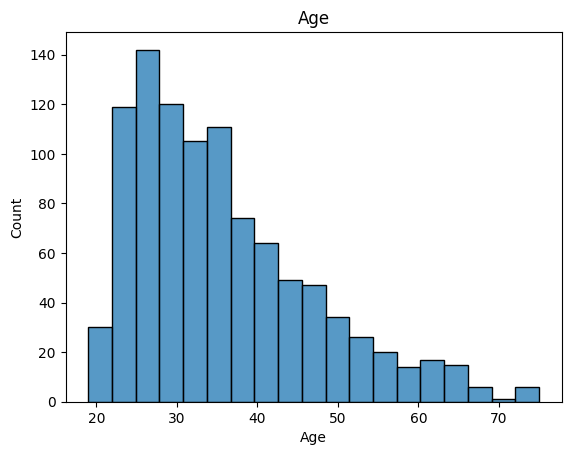

In [5]:
sns.histplot(x=data['Age'])
plt.title('Age')
plt.show()

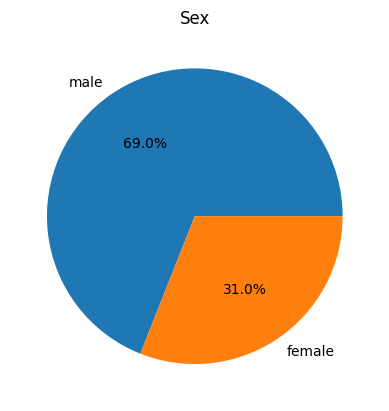

In [6]:
plt.pie(data['Sex'].value_counts(), labels= data['Sex'].value_counts().index, autopct = '%1.1f%%')
plt.title('Sex')
plt.show()

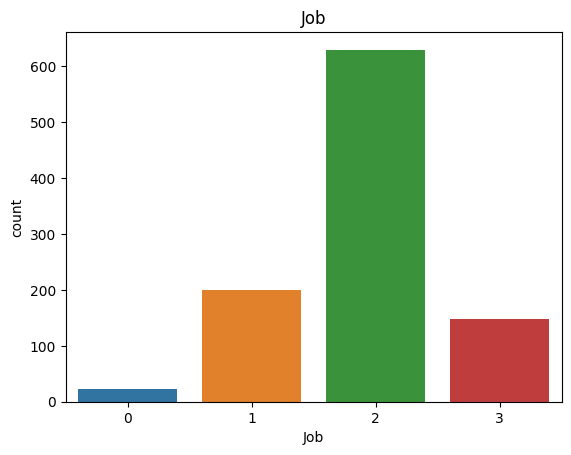

In [7]:
sns.countplot(x=data['Job'])
plt.title('Job')
plt.show()

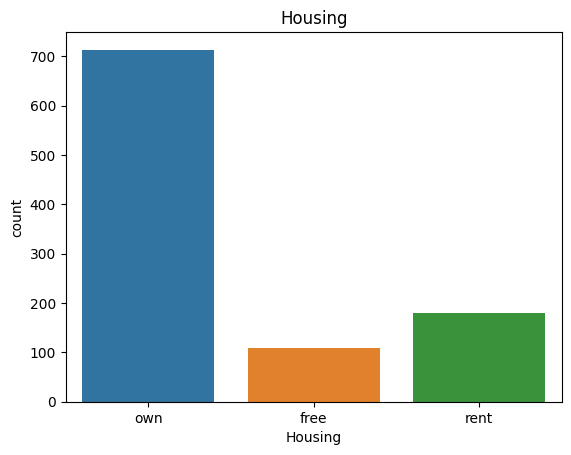

In [8]:
sns.countplot(x=data['Housing'])
plt.title('Housing')
plt.show()

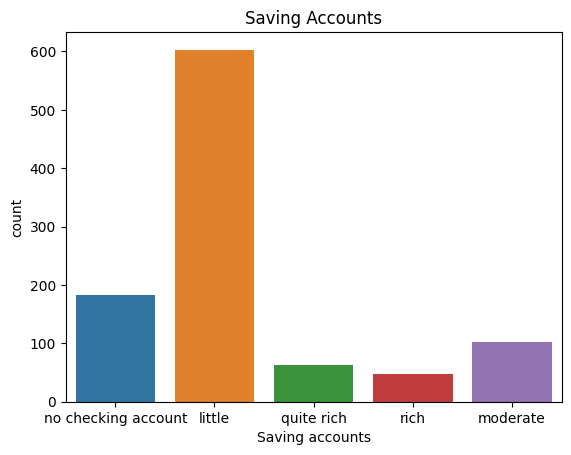

In [9]:
sns.countplot(x=data['Saving accounts'])
plt.title('Saving Accounts')
plt.show()

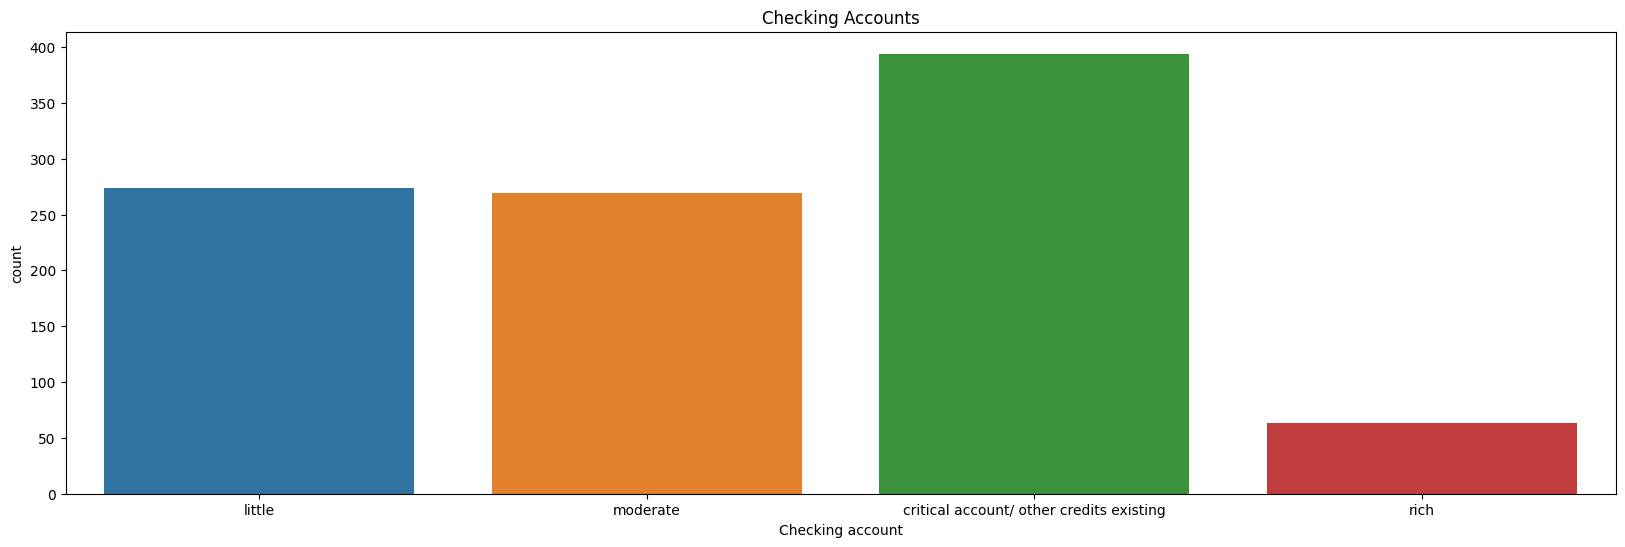

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['Checking account'])
plt.title('Checking Accounts')
plt.show()

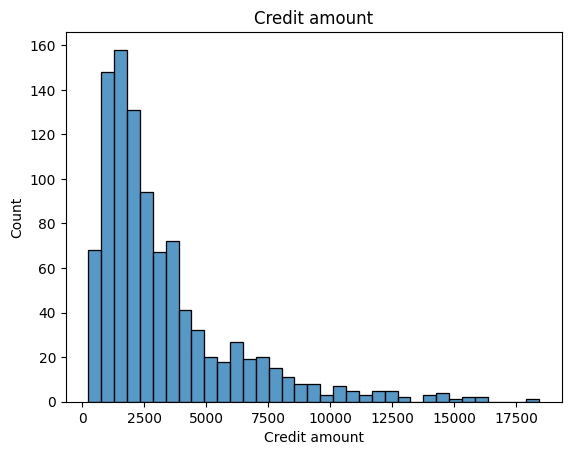

In [11]:
sns.histplot(x=data['Credit amount'])
plt.title('Credit amount')
plt.show()

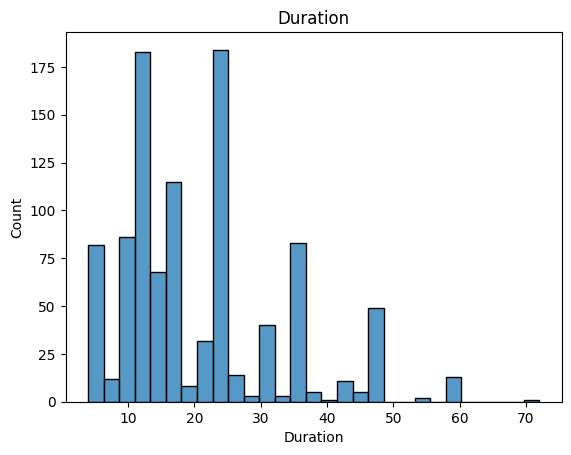

In [12]:
sns.histplot(x=data['Duration'])
plt.title('Duration')
plt.show()

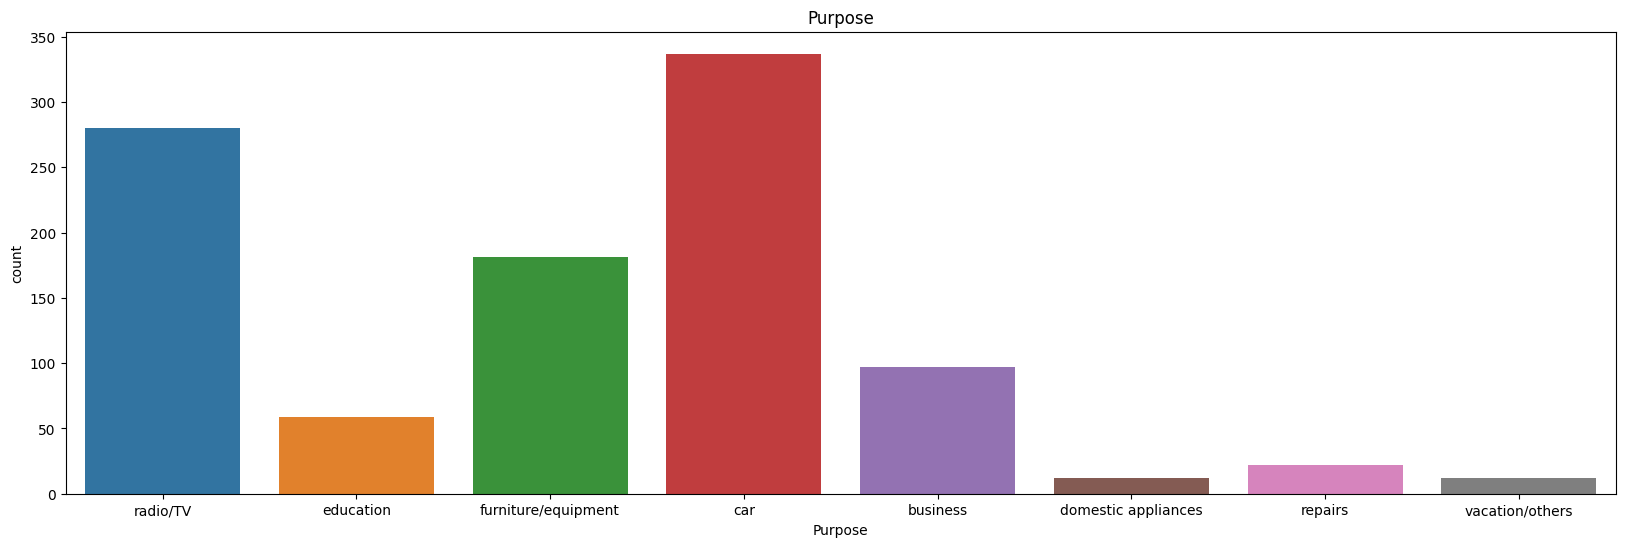

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['Purpose'])
plt.title('Purpose')
plt.show()

In [14]:
# Split data
df_train_val, df_test = train_test_split(data, test_size=0.1, random_state=27)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=27)

print('Train Size : ', df_train.shape)
print('Val Size : ', df_test.shape)
print('Test Size : ', df_val.shape)

Train Size :  (720, 9)
Val Size :  (100, 9)
Test Size :  (180, 9)


In [15]:
print(f'X_train proportion: {len(df_train) / len(data):.1f}')
print(f'X_test proportion: {len(df_test) / len(data):.1f}')
print(f'X_val proportion: {len(df_val) / len(data):.1f}')

X_train proportion: 0.7
X_test proportion: 0.1
X_val proportion: 0.2


In [16]:
num_columns = df_train.select_dtypes(include=[np.number]).columns.tolist() # memasukan kolom bertipe data numerik
cat_columns = df_train.select_dtypes(include=['object']).columns.tolist() # memasukan kolom bertipe data obj 

# melihat isi dari num_columns dan cat_columns
print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Age', 'Job', 'Credit amount', 'Duration']
Cat Columns :  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [17]:
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train[num_columns])
df_final = pd.DataFrame(df_train_scaled, columns=num_columns)

In [18]:
# Untuk Visualisasi data adlam 2 dimensi
pca_2d=PCA(n_components=2, random_state=27)
vis=pca_2d.fit_transform(df_final)

In [20]:
pca = PCA(n_components=4).fit(df_final)
cumsum = np.cumsum(pca.explained_variance_ratio_)

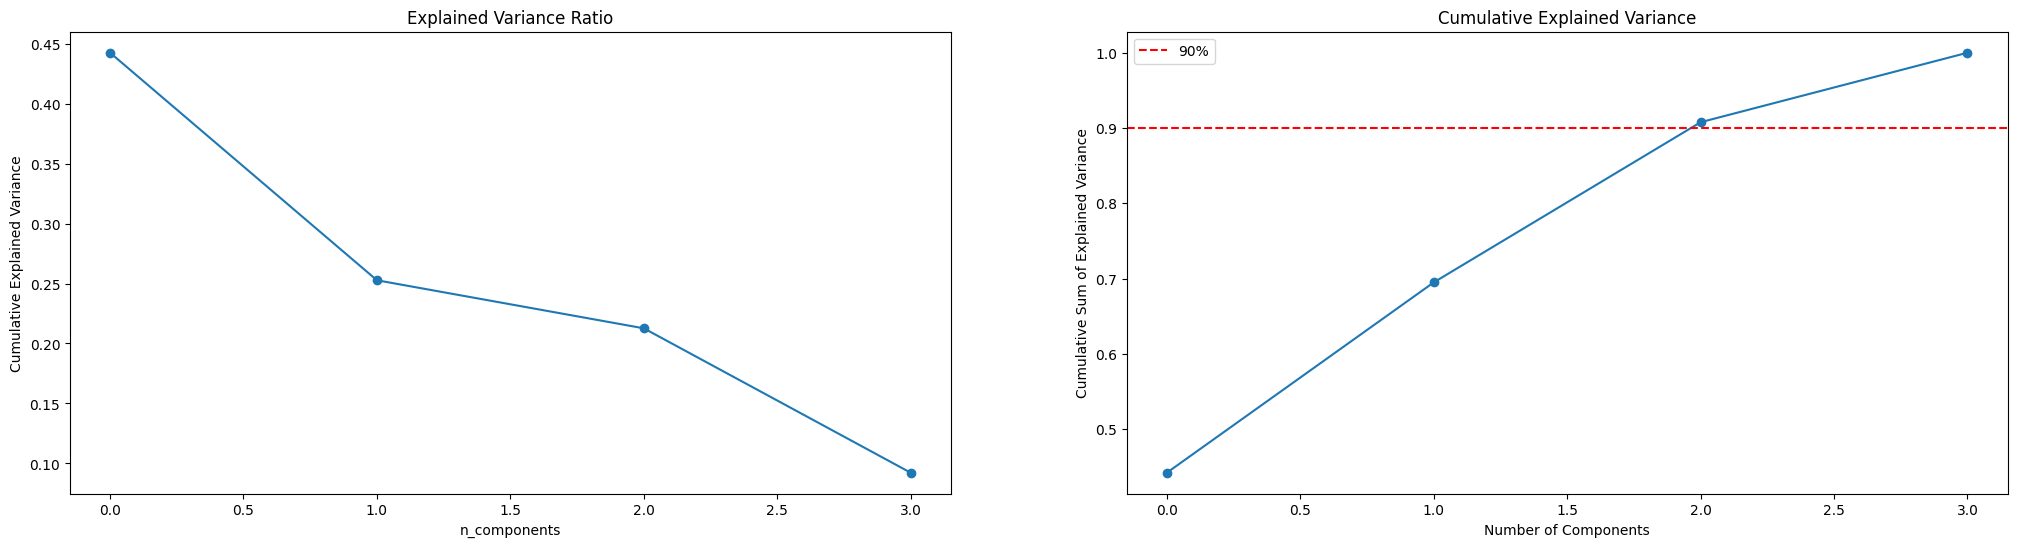

Number of components: 2
Explained variance: 0.907732298539215


In [22]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')
plt.subplot(1, 2, 2)
plt.plot(cumsum, marker='o')
plt.axhline(y=0.9, color='red', linestyle='--', label='90%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()
print(f'Number of components: {np.argmax(cumsum >= 0.9)}')
print(f'Explained variance: {cumsum[np.argmax(cumsum >= 0.9)]}')

In [23]:
pca_2d = PCA(n_components=2, random_state=27)

In [24]:
df_train_red = pca_2d.fit_transform(df_final)

# Convert to dataframe
df_train_red = pd.DataFrame(df_train_red, columns=['PCA_' + str(i) for i in range(1, 3)])

In [25]:
df_train_red

,PCA_1,PCA_2
0,-0.447176,-0.119676
1,-0.836850,0.627327
2,1.422318,-0.800974
3,-0.238086,-0.203238
4,0.517628,-0.046062
...,...,...
715,0.098644,-0.713698
716,0.479080,0.004626
717,0.483598,0.591229
718,-0.194053,0.403656


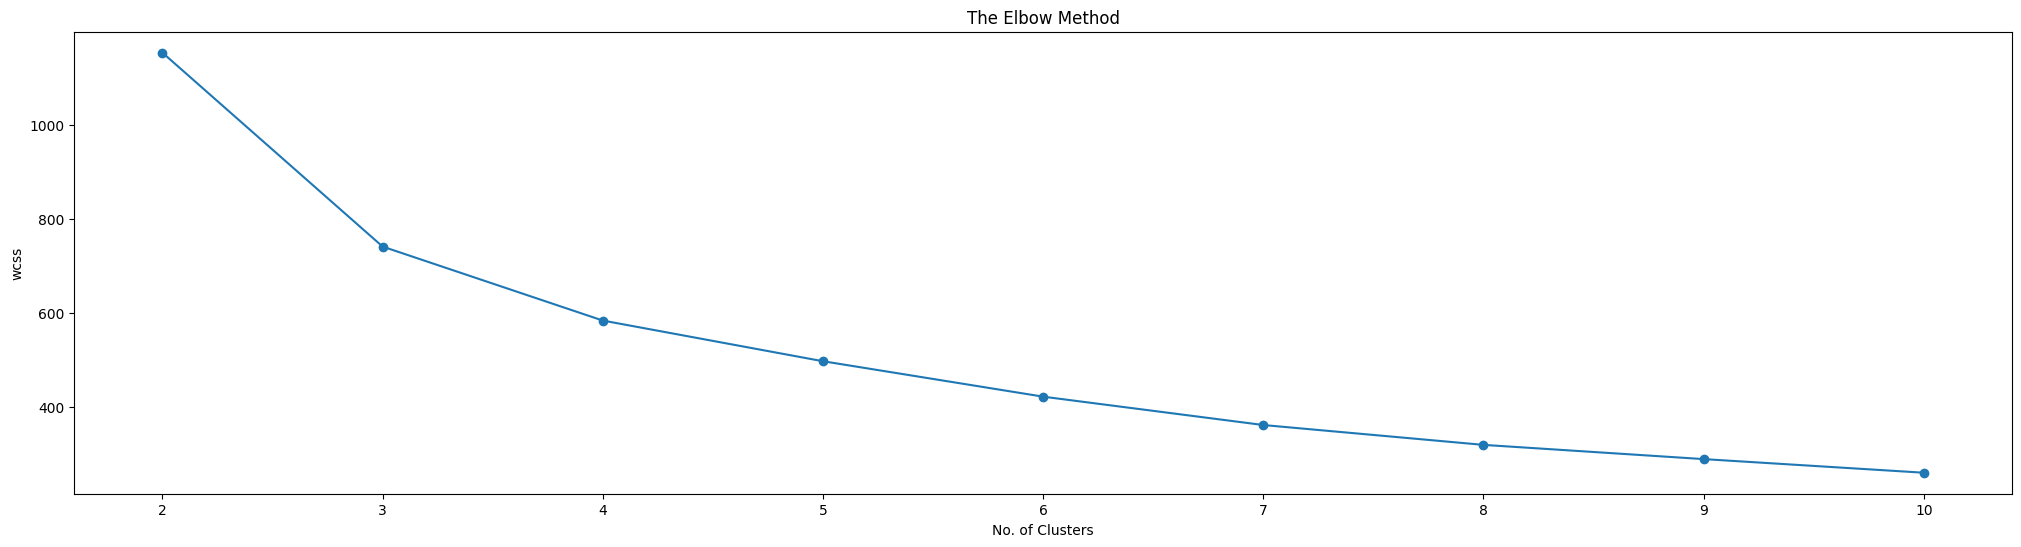

In [26]:
wcss = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 27)
    km.fit(df_train_red)
    wcss.append(km.inertia_)

plt.figure(figsize=(25, 6))   
plt.plot(range(2, 11), wcss, marker ="o")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
# Mencari score siluet
kmeans_score = pd.DataFrame(columns=['K', 'Silhouette Score'])
for i in range(2, 11):
    kmeans_score.loc[i-2] = [i, round(silhouette_score(df_train_red, KMeans(n_clusters=i, random_state=27).fit(df_train_red).labels_), 3)]


In [28]:
kmeans_score.sort_values(by='Silhouette Score', ascending=False)

,K,Silhouette Score
0,2.0,0.455
1,3.0,0.425
2,4.0,0.351
7,9.0,0.346
3,5.0,0.343
8,10.0,0.343
5,7.0,0.340
6,8.0,0.339
4,6.0,0.330


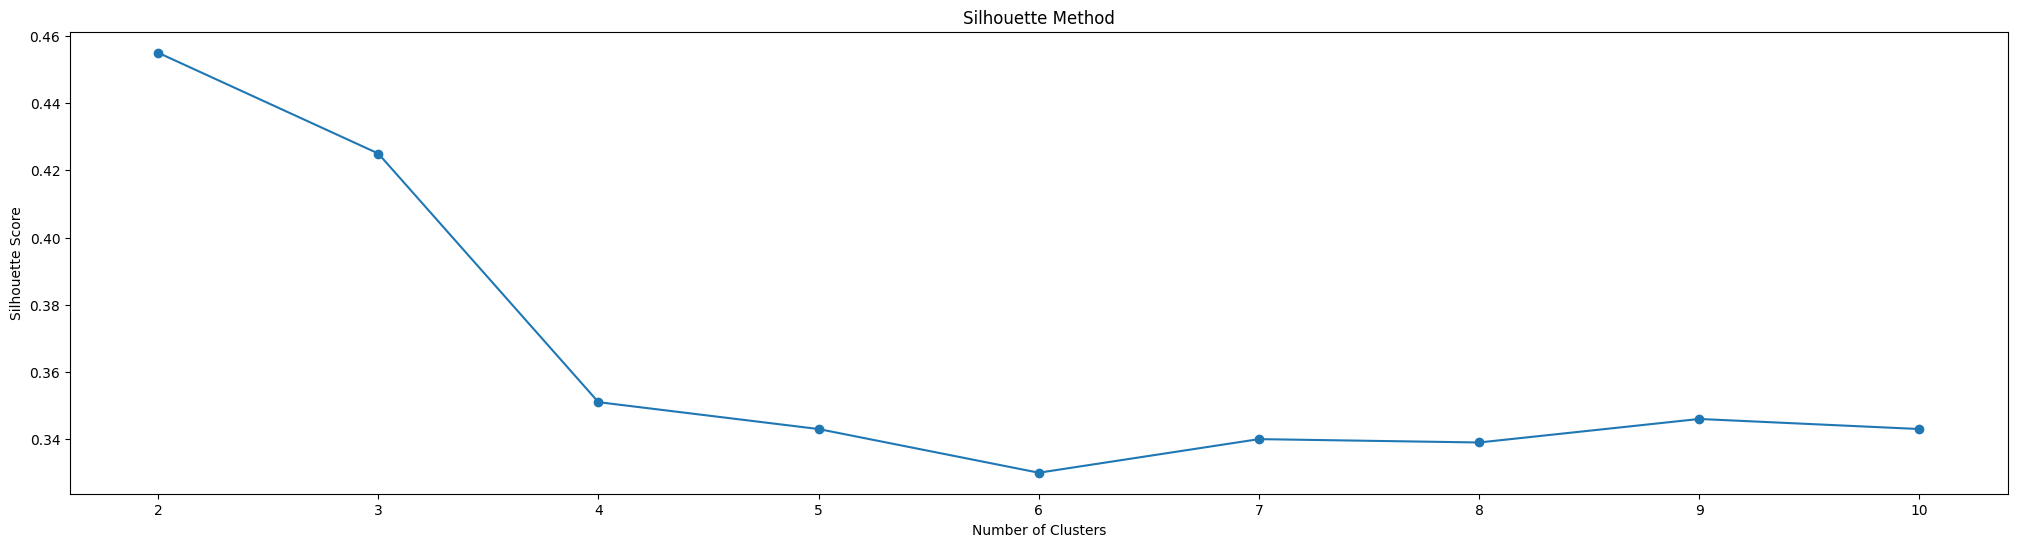

In [29]:
plt.figure(figsize=(25, 6))
plt.plot(kmeans_score['K'], kmeans_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [62]:
kmeans = KMeans(n_clusters=4, random_state=27)
df_pred = kmeans.fit_predict(df_train_red)

In [63]:
df_train_red['CLUSTER'] = df_pred

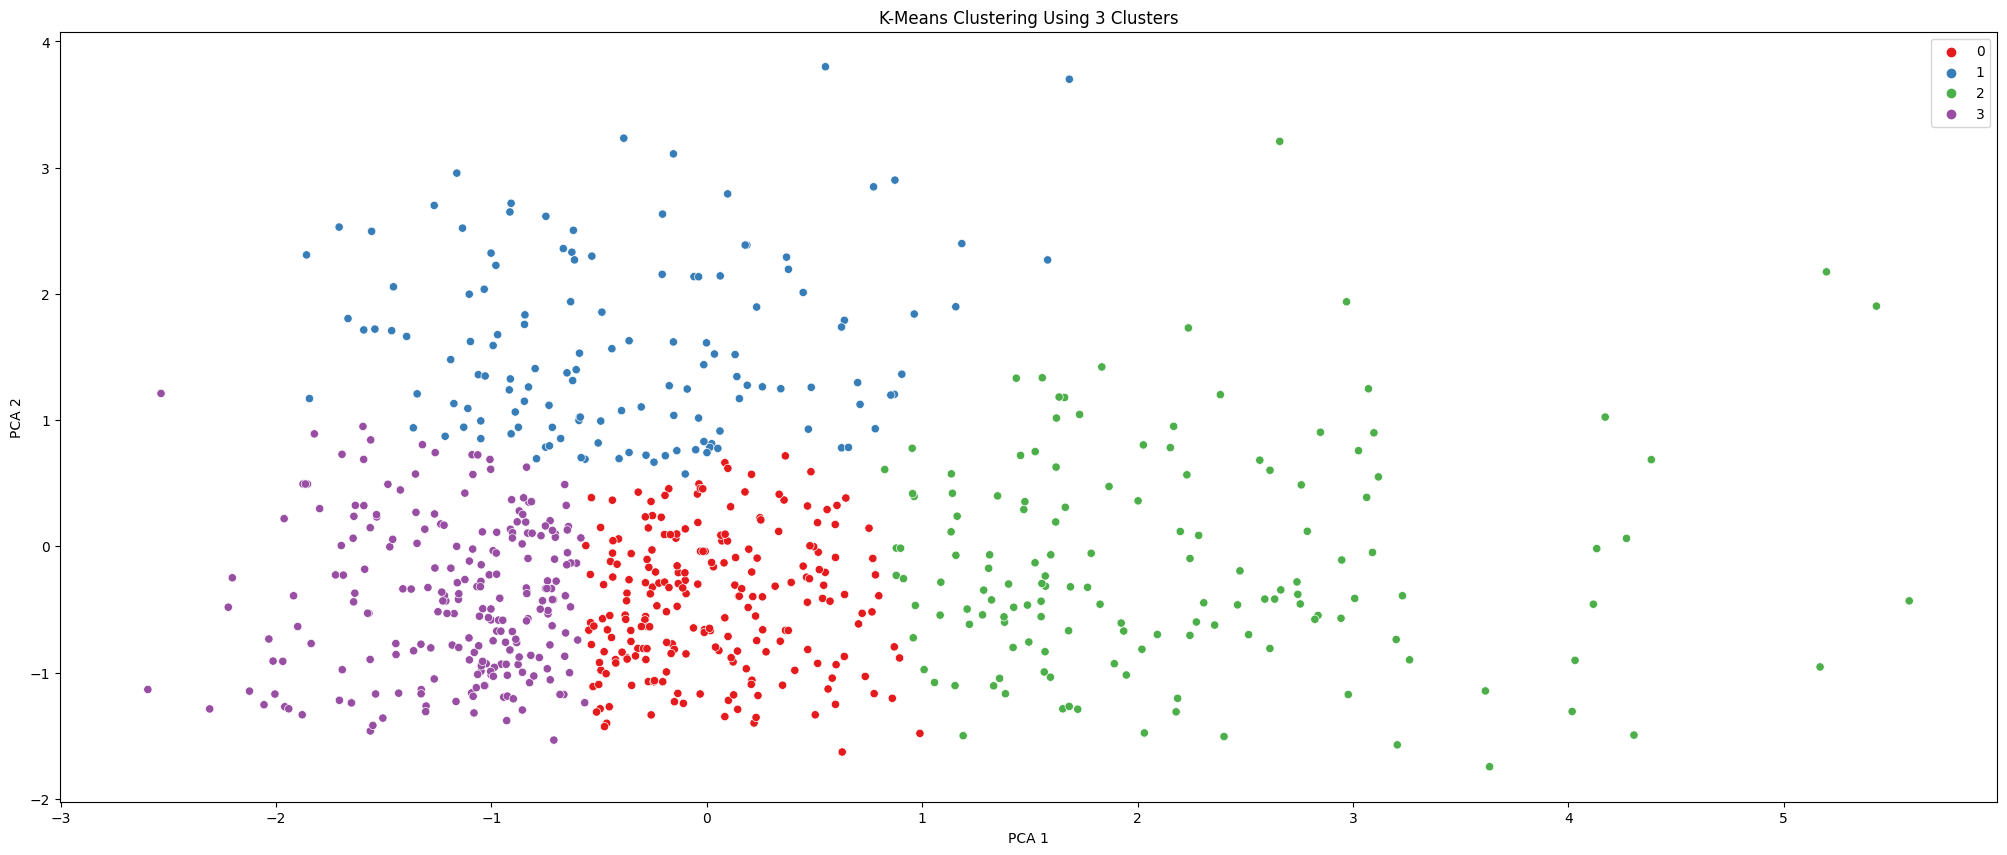

In [64]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x=vis[:,0], y=vis[:, 1], hue=df_pred, data=df_train_red, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [65]:
df_train_red

,PCA_1,PCA_2,CLUSTER
0,-0.447176,-0.119676,0
1,-0.836850,0.627327,3
2,1.422318,-0.800974,2
3,-0.238086,-0.203238,0
4,0.517628,-0.046062,0
...,...,...,...
715,0.098644,-0.713698,0
716,0.479080,0.004626,0
717,0.483598,0.591229,0
718,-0.194053,0.403656,0


In [66]:
df_train = df_train.reset_index(drop=True)
df_train_red['CLUSTER'] = df_train_red['CLUSTER'].reset_index(drop=True)

data_fix = pd.concat([df_train, df_train_red['CLUSTER']], axis=1)


In [67]:
data_fix

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,CLUSTER
0,32,female,2,own,little,critical account/ other credits existing,4611,6,furniture/equipment,0
1,41,male,2,rent,little,critical account/ other credits existing,1503,12,car,3
2,27,male,2,own,little,critical account/ other credits existing,8648,24,business,2
3,33,male,2,own,moderate,critical account/ other credits existing,1474,24,car,0
4,31,female,3,own,quite rich,critical account/ other credits existing,2782,21,car,0
...,...,...,...,...,...,...,...,...,...,...
715,27,male,2,own,little,moderate,3652,21,business,0
716,37,male,2,free,little,critical account/ other credits existing,1819,36,education,0
717,38,male,3,own,no checking account,critical account/ other credits existing,3229,18,car,0
718,40,male,2,own,little,critical account/ other credits existing,1585,24,furniture/equipment,0


## Analysis Cluster

In [68]:
cluster0 = data_fix[data_fix.CLUSTER == 0]
cluster1 = data_fix[data_fix.CLUSTER == 1]
cluster2 = data_fix[data_fix.CLUSTER == 2]
cluster3 = data_fix[data_fix.CLUSTER == 3]

In [69]:
cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,217.0,30.041475,5.508674,20.0,26.0,30.0,34.0,45.0
Job,217.0,2.018433,0.544017,0.0,2.0,2.0,2.0,3.0
Credit amount,217.0,2983.235023,1456.642987,629.0,2022.0,2782.0,3651.0,14555.0
Duration,217.0,22.188940,6.993136,6.0,18.0,24.0,24.0,48.0
CLUSTER,217.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [70]:
cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,134.0,52.641791,7.978734,40.0,46.00,50.0,59.75,75.0
Job,134.0,1.985075,0.600565,0.0,2.00,2.0,2.00,3.0
Credit amount,134.0,2333.350746,1470.936729,338.0,1257.25,1959.0,2897.25,7596.0
Duration,134.0,16.731343,7.660232,6.0,12.00,15.0,24.00,36.0
CLUSTER,134.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [71]:
cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,143.0,35.153846,9.424502,21.0,28.0,34.0,40.0,68.0
Job,143.0,2.342657,0.582671,1.0,2.0,2.0,3.0,3.0
Credit amount,143.0,7503.741259,3125.113687,1977.0,5367.5,7057.0,8962.5,18424.0
Duration,143.0,38.671329,11.565354,6.0,30.0,36.0,48.0,72.0
CLUSTER,143.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [72]:
cluster3.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,226.0,30.747788,6.990986,20.0,25.00,30.0,35.0,54.0
Job,226.0,1.522124,0.597734,0.0,1.00,2.0,2.0,3.0
Credit amount,226.0,1492.840708,842.732973,276.0,950.25,1344.5,1775.5,7472.0
Duration,226.0,11.933628,4.559729,4.0,9.00,12.0,15.0,24.0
CLUSTER,226.0,3.000000,0.000000,3.0,3.00,3.0,3.0,3.0
